## Chapter 3 - Linear Regressions - All graphs

The following notebook is a re-creation from
[JWarmenhoven's notebook](https://nbviewer.jupyter.org/github/JWarmenhoven/ISLR-python/tree/master/Notebooks/)
with the purpose of learning.

#### Import Block:

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline 
plt.style.use('seaborn-white')

### Load datasets

In [27]:
print('Advertising.csv')
data_path = 'D:\\PycharmProjects\\ISLR\\data\\' 
advertising = pd.read_csv(f'{data_path}Advertising.csv', usecols=[1, 2, 3, 4])
advertising.info()

Advertising.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
print('Credit.csv')
credit = pd.read_csv('D:\\PycharmProjects\\ISLR\\data\\Credit.csv', usecols=list(range(1, 12)))
# Convert Student to boolean (Male = 0, Female = 1)
for i in ['Student', 'Married','Gender']:
    credit[i] = credit[i].astype('category').cat.codes
credit.head(3)

Credit.csv


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,0,0,1,Caucasian,333
1,106.025,6645,483,3,82,15,1,1,1,Asian,903
2,104.593,7075,514,4,71,11,0,0,0,Asian,580


In [29]:
print('Auto.csv')
auto = pd.read_csv(f'{data_path}Auto.csv', na_values='?').dropna()
auto.info()

Auto.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 3.1 Simple Linear Regression

### Figure 3.1 - Least squares fit

(0, 28.281704763383004)

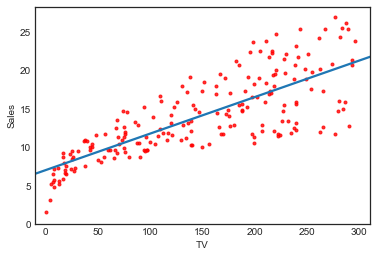

In [30]:
sns.regplot(data=advertising, x='TV', y='Sales', order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0)

### Figure 3.2 - Regression coefficients - RSS

Note that the text in the book describes the coefficients based on uncentered data, 
whereas the plot shows the model based on centered data. 
The latter is visually more appealing for explaining the concept of a minimum RSS. 
To confuse the reader, the values on the axis of the B0 coefficients have been changed to correspond with the text. 
The axes on the plots below are unaltered.

In [31]:
# Regression coefficients (OLS)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [32]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j), v in np.ndenumerate(Z):
    Z[i,j]=((y - (xx[i,j] + X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

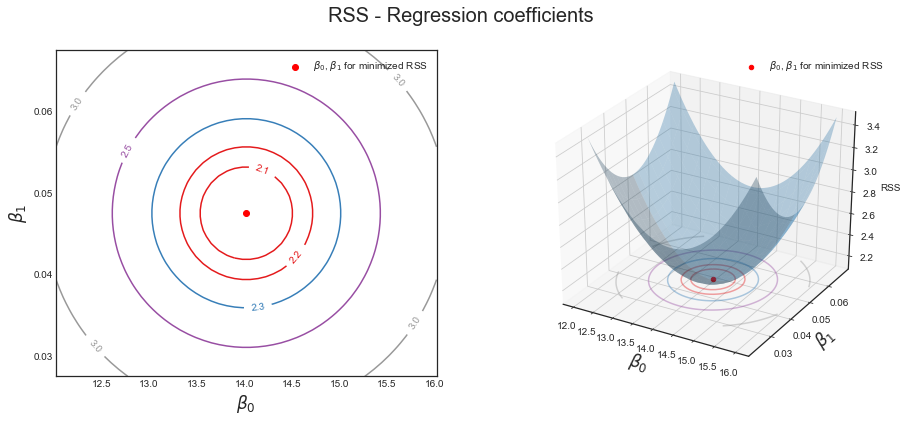

In [33]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

### Confidence interval on page 67 & Table 3.1 & 3.2 - Statsmodels

In [34]:
mod = smf.ols('Sales ~ TV', data=advertising)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [35]:
# RSS with regression coefficients
rss = np.sum(reg.resid**2)
# rss2 = ((advertising.Sales - (reg.params[0] + reg.params[1]*advertising.TV))**2).sum()/1000
print(rss)

2102.5305831313512


### Table 3.1 & 3.2 - scikitlearn

In [36]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)
print(regr._residues)

7.032593549127695
[0.04753664]
2102.5305831313517


In [37]:
# Sales Predict
Sale_pred = regr.predict(X)
r2_score(y, Sale_pred)

0.611875050850071

## 3.2 Multiple Linear Regression

### Table 3.3 - Statsmodels

In [38]:
mod = smf.ols('Sales ~ Radio', data=advertising)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [39]:
mod = smf.ols('Sales ~ Newspaper', data=advertising)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Table 3.4 & 3.6 - Statsmodels

In [40]:
mod = smf.ols('Sales ~ TV + Radio + Newspaper', data=advertising)
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        12:04:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 - Correlation matrix

In [41]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Figure 3.5 - Multiple Linear Regression

In [42]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].to_numpy()
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

2.921099912405138
[0.18799423 0.04575482]


Text(0.5, 0, 'Sales')

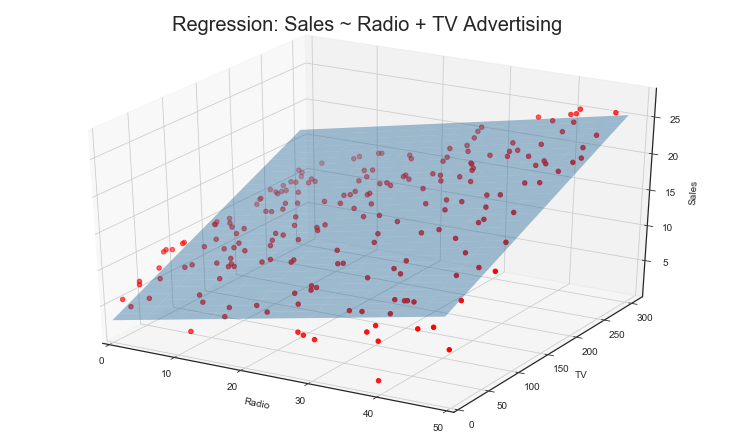

In [43]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting
advertising[['Radio', 'TV']].describe()
# Create a coordinate grid
Radio = np.arange(0, 50)
TV = np.arange(0, 300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = (regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('Sales')

## Other Considerations in the Regression Model

### Figure 3.6

In [44]:
#sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

### Table 3.7

In [45]:
mod = smf.ols('Balance ~ Gender', data=credit)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender,19.7331,46.051,0.429,0.669,-70.801,110.267


### Table 3.8

In [46]:
mod = smf.ols('Balance ~ Ethnicity', data=credit)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### Table 3.9 - Interaction variables

In [47]:
mod = smf.ols('Sales ~ TV + Radio + TV*Radio', data=advertising)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### Figure 3.7 - Interaction between qualitative and quantitative variables

In [48]:
mod1 = smf.ols('Balance ~ Income + Student', data=credit)
mod2 = smf.ols('Balance ~ Income + Income*Student', data=credit)
reg1 = mod1.fit()
reg2 = mod2.fit()

print('Regression 1 - without interaction term')
print(reg1.params)
print('\nRegression 2 - with interaction term')
print(reg2.params)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student      382.670539
dtype: float64

Regression 2 - with interaction term
Intercept         200.623153
Income              6.218169
Student           476.675843
Income:Student     -1.999151
dtype: float64


(0.0, 1550)

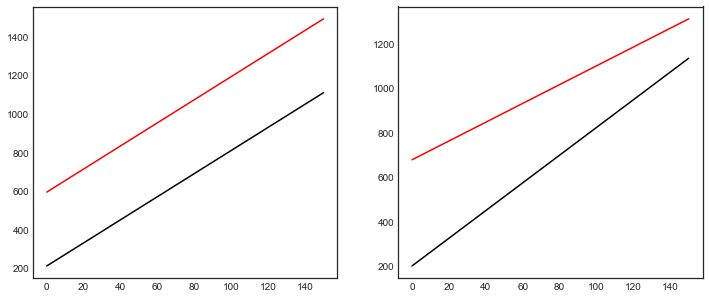

In [49]:
# Income (x-axis)
income = np.linspace(0,150)
reg1_intercept, reg1_Income, reg1_Student = reg1.params
reg2_intercept, reg2_Income, reg2_Student, reg2_Income_Student= reg2.params

# Balance without interaction term (y-axis)
student1 = np.linspace(reg1_intercept + reg1_Student, reg1_intercept + reg1_Student + 150*reg1_Income)
non_student1 =  np.linspace(reg1_intercept, reg1_intercept + 150*reg1_Income)

# Balance with interaction term (y-axis)
student2 = np.linspace(reg2_intercept + reg2_Student, reg2_intercept + reg2_Student + 150*(reg2_Income + reg2_Income_Student))
non_student2 =  np.linspace(reg2_intercept, reg2_intercept+150*reg2_Income)

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

# for ax in fig.axes:
ax.legend(['student', 'non-student'], loc=2)
ax.set_xlabel('Income')
ax.set_ylabel('Balance')
ax.set_ylim(top=1550)

### Figure 3.8 - Non-linear relationships

(40, 240)

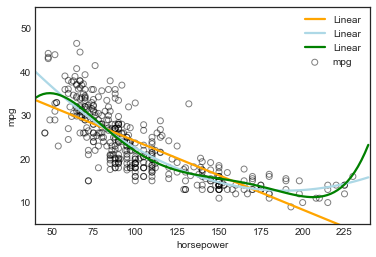

In [50]:
# Using seaborn package to plot 3 regressions
plt.scatter(x='horsepower', y='mpg', data=auto, facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(x='horsepower', y='mpg', data=auto, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x='horsepower', y='mpg', data=auto, ci=None, label='Linear', scatter=False, color='lightblue', order=2)
sns.regplot(x='horsepower', y='mpg', data=auto, ci=None, label='Linear', scatter=False, color='g', order=5)
plt.legend()
plt.ylim(5, 55)
plt.xlim(40, 240)

### Table 3.10

In [51]:
mod = smf.ols('mpg ~ horsepower + np.power(horsepower, 2)', data=auto)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
"np.power(horsepower, 2)",0.0012,0.000,10.080,0.000,0.001,0.001


### Figure 3.9